<div class="alert alert-info" role="alert">
<h1 align='center'>Housing Price Prediction Model</h1>
</div>




<h3> Project Objectives</h3>

* Developing a predictive price model for houses as it is very important for real estate sector to estimate prices of propreties.
* Using a wide varity of analytics tools and techniques.
  

<h3>About the dataset</h3>

* **Link to the Data:** Click <a href="https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/data">HERE</a>.
* **My LinkedIn:** <a href="https://www.linkedin.com/in/ramez-ellamey-b931b8a9/">Ramez Ellamey</a>.
* **My GitHub Portfolio:** <a href="https://github.com/ramez-abdelsalam/Portfolio">HERE</a>
* **Usability:** 10.
* **Licence:** CCO: Public Domain.
* This dataset provides key features for predicting house prices, including area, bedrooms, bathrooms, stories, amenities like air conditioning and parking, and information on furnishing status. It enables analysis and modelling to understand the factors impacting house prices and develop accurate predictions in real estate markets.



<h3>Columns Discription</h3>



- Price: The price of the house.
- Area: The total area of the house in square feet.
- Bedrooms: The number of bedrooms in the house.
- Bathrooms: The number of bathrooms in the house.
- Stories: The number of stories in the house.
- Mainroad: Whether the house is connected to the main road (Yes/No).
- Guestroom: Whether the house has a guest room (Yes/No).
- Basement: Whether the house has a basement (Yes/No).
- Hot water heating: Whether the house has a hot water heating system (Yes/No).
- Airconditioning: Whether the house has an air conditioning system (Yes/No).
- Parking: The number of parking spaces available within the house.
- Prefarea: Whether the house is located in a preferred area (Yes/No).
- Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

<div class="alert alert-success" role="alert">
    <strong><h4 align='center'><b>1- Project Overview</b></h4></strong> 
</div>


- Importing Data & Libraries needed
- Data Cleaning & EDA
- Data preprocessing
- Feature Engineering
- Model Selection
- Model Training
- Model Evaluation
- Documenting Results
- Decision making


<div class="alert alert-success" role="alert">
    <strong><h4 align='center'><b>Importing Libraries & Data</b></h4></strong> 
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Further i will import the below listed libraries and models when needed.

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import Pipeline
# from scipy import stats

In [2]:
# importing the csv file to a dataframe df and printing a sample.

df=pd.read_csv(r"C:\Users\Ramez\Downloads\New folder\1- datasets\Houses Price Prediction\Housing.csv")
df.sample(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
396,3500000,3640,2,1,1,yes,no,no,no,no,1,no,semi-furnished
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished
26,8463000,6000,3,2,4,yes,yes,yes,no,yes,0,yes,semi-furnished


In [3]:
df.shape

(545, 13)

<div class="alert alert-success" role="alert">
       <strong><h4 align='center'><b>Data Cleaning & EDA</b></h4></strong>
    
</div>

In [4]:
# Looking for & cleaning duplicates

print('There are', df.duplicated().sum(), "Duplicate row") 

There are 0 Duplicate row


In [5]:
# Nulls

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
# An overview of data distribution

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df['price'].max(), df['price'].quantile(.75), df['area'].max(), df['area'].quantile(.75)

(13300000, 5740000.0, 16200, 6360.0)

- For the price column, 75% of the data falls below 5.7 mil while max value is 13 mil, that is an indicator of outliers.
- For area column, 75% of the data falls below 6360 SqFt while the max is 16200 SqFt, again an indicator of outliers.
- Taking a look at the distribution via boxplot next.

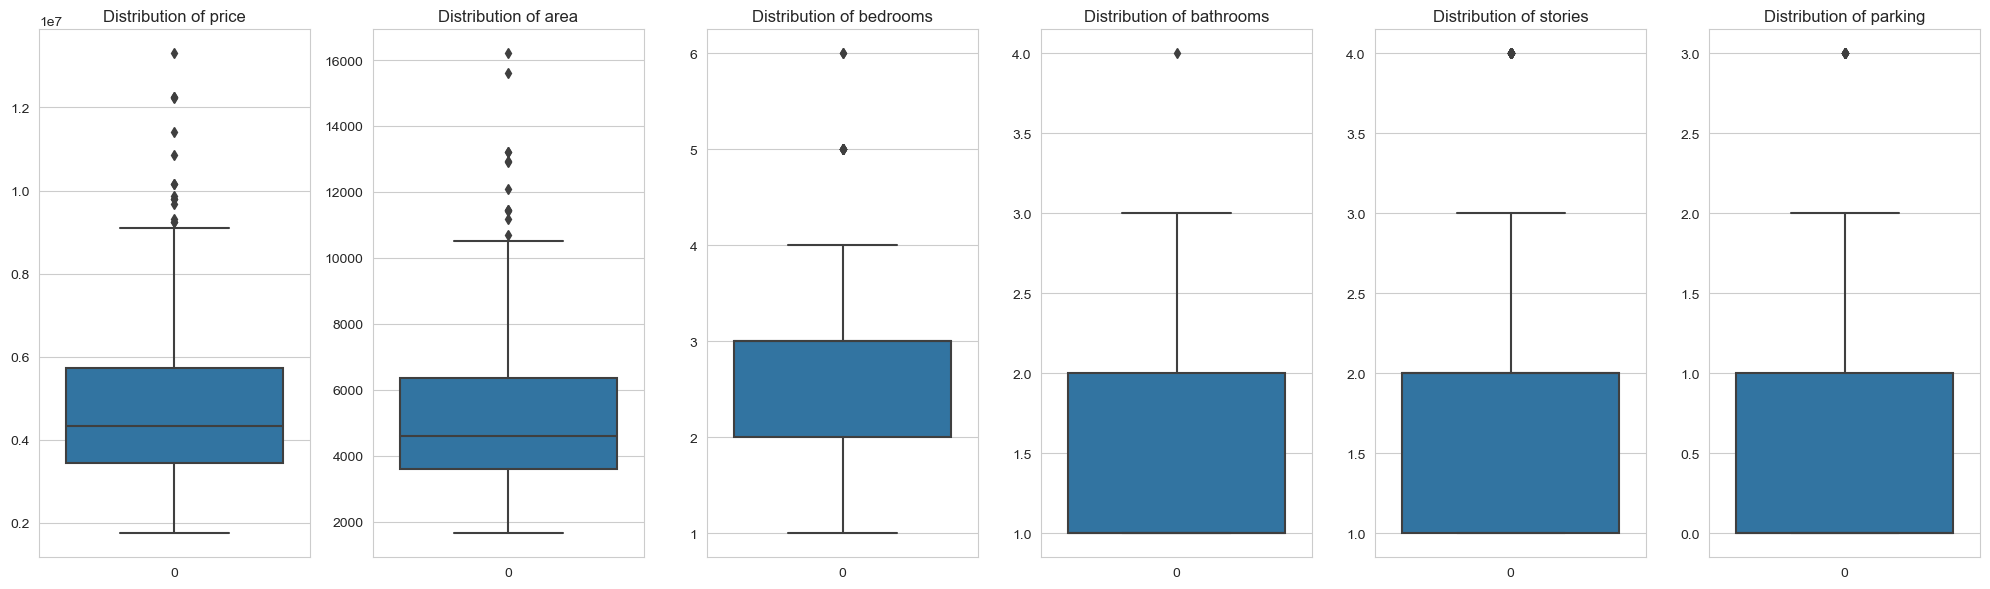

In [8]:
# Boxplotting all numerical values.

# Set style for all graphs
sns.set_style("whitegrid")

# Create a grid of subplots
fig, axs = plt.subplots(ncols=6 , figsize=(20, 6))

# Plot distributions of non categorical values
for ax, column in zip(axs, ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']):
    
    # Exclude missing values from the column before plotting if existing
    data = df[column].dropna()
    
    # Create the boxplot
    sns.boxplot(data=data, ax=ax)
    
    # Set the title
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [9]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Loop through each column and remove outliers
for column in df[['price', 'area', 'parking', 'bathrooms']]:
    df = remove_outliers_iqr(df, column)

# Display the DataFrame without outliers
print(df.shape)

(501, 13)


<div class="alert alert-warning" role="alert">
    <b>Experimenting on different outlier removal, I got the best result for the four columns listed above.</b>
</div>

In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.010000e+02,501.000000,501.000000,501.000000,501.000000,501.000000
mean,4.559234e+06,4850.331337,2.930140,1.241517,1.792415,0.604790
std,1.596731e+06,1755.471847,0.730144,0.428431,0.863031,0.781983
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.395000e+06,3520.000000,2.000000,1.000000,1.000000,0.000000
50%,4.235000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.530000e+06,6000.000000,3.000000,1.000000,2.000000,1.000000
max,9.100000e+06,10360.000000,6.000000,2.000000,4.000000,2.000000


In [11]:
df['price'].max(), df['price'].min()

(9100000, 1750000)

<div class="alert alert-success" role="alert">
    <strong><h4 align='center'><b>Data Preprocessing</b></h4></strong> 
</div>

- Categorical variable could be important to the model but most statistical models can't take it as an input.
- Coverting categorical variables to quantitative ones via OneHotEncoding method.
- It can be transformed by OneHotEncoder from sklearn.preprocessing but the below method is simpler.
- Converting SqFt to SqM

<h4>* OneHotEncoding </h4>

In [12]:
# Get_dummies function to transform categorical to quantitative.

df_encoded = (
    pd.get_dummies
              (df, columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])
    .astype(int)
             )
df_encoded.sample(3)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
505,2653000,4000,3,1,2,0,0,1,1,0,...,0,1,0,0,1,1,0,0,0,1
382,3570000,3150,3,1,2,0,0,1,1,0,...,1,1,0,1,0,1,0,1,0,0
207,4900000,3000,3,1,2,0,0,1,1,0,...,1,1,0,0,1,1,0,0,1,0


<h4>* Data Formatting</h4>

Converting Sqft to Sqm as Sqm is universal.

In [13]:
dfm2 = df
dfm2['area_m2']= df['area']/10.7639104
del dfm2['area']

In [14]:
dfm2_encoded = ( 
    pd.get_dummies(
        dfm2, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])
    .astype(int)
)
dfm2_encoded.sample(3)

,price,bedrooms,bathrooms,stories,parking,area_m2,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
487,2870000,4,1,2,0,501,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
297,4200000,3,2,2,0,338,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
149,5600000,4,2,1,0,613,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0


In [15]:
# splitting the target varible 'Price' from all other predictors variables

x=df_encoded.drop(columns=['price'], axis=1)  # Predictor variables
y=df_encoded['price']                         # Target value


xm2 = dfm2_encoded.drop(columns=['price'], axis = 1)
ym2=dfm2_encoded['price']

<div class="alert alert-success" role="alert">
    <strong><h4 align='center'><b>Model Training & Evaluation</b></h4></strong> 
</div>

* 1- Calling the train_test_split to split the dataframe into training and testing samples.
* 2- Importing Linear Regressing model.
* 3- Fitting of the predictor and trarget variables into a LR model.
* 4- Predicting the target variable using the test sample predictors using the fitted model.
* 5- importing the model evaluation metric 'mean_absolute_error'.
* 6- Testing the predicted price result against the actual price of the test sample for model evaluation.

<h4>* Model Training</h4>


In [16]:
# splitting x & y datasets into train and test sets.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2 , random_state=42) 
# random_state=42 so User do not get different raws & different results everytime using the model.

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((400, 20), (400,), (101, 20), (101,))

In [17]:
# Splitting the square metre dataframe

xm2_train, xm2_test, ym2_train, ym2_test = train_test_split(xm2, ym2, test_size=0.2 , random_state=42)

xm2_train.shape, xm2_test.shape, ym2_train.shape, ym2_test.shape

((400, 20), (101, 20), (400,), (101,))

In [18]:
# importing the Linear Regression model for fitting of out predictor variables

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train) # Fitting the predictors and the target value by the LR

LinearRegression()

In [19]:
# Printing the top 5 rows of the test sample

y_test[:5]

404    3493000
97     6300000
417    3395000
184    5110000
130    5866000
Name: price, dtype: int32

In [20]:
# Using the fitted model to predict the prices y_pred using the testing predictors x_test.

y_pred = lr.predict(x_test)

In [21]:
# Top 5 rows of the predicted prices.

y_pred[:5]

array([3217843.39815994, 5926848.87433542, 3162042.35373946,
       4926512.75522854, 3694649.43698428])

In [22]:
lr.fit(xm2_train,ym2_train)

LinearRegression()

In [23]:
# Predicting results for dfm2

ym2_pred = lr.predict(xm2_test)
ym2_pred[:5]

array([3218296.12548648, 5926575.28559359, 3162914.4751475 ,
       4926102.33249282, 3693426.6944381 ])

<h4>* Evaluation</h4>

In [24]:
# Calling the evaluation metric 'mean_absolute_error' MAE.

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
# Comparing the prices of the test sample y_test against the LR model price prediction

mean_absolute_error(y_test, y_pred)

665602.0180010083

In [26]:
y_test.mean()

4543554.455445545

In [27]:
# MAE above looks high.
# Is MAE really high?! comparing it to test sample mean will tell.
# A MAE les then 10% of the test sample mean can be considered good.

mean_absolute_error(y_test, y_pred)* 100/y_test.mean()

14.649368121983668

In [28]:
# In sample evaluation for the SqFt dataframe

mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)

(665602.0180010083, 0.747659622660183)

In [29]:
# Evaluation for M2 dataframe

mean_absolute_error(ym2_test, ym2_pred), r2_score(ym2_test, ym2_pred)

(665355.0147424549, 0.7477138179826605)

Fitting all predictor variables with outliers removed, but without data normalization

    SqFt
    MAE = 665602.0180010083
    r2_score = 0.747659622660183

    M2
    MAE = 665355.0147424549
    r2_score = 0.7477138179826605

<h4>* Result:-</h4>

    Not much of a difference between using the dataframe with SqFt unit and the formatted dataframe to M2.
    A high mean_absolute_error, it might be due to the data not being normalized.
    r2_score is close to good on the other hand, but a good r2_score is 0.8 and above.
    So i will normalize the data and fit the model again and compare the two results.

<div class="alert alert-success" role="alert">
    <strong><h4  align='center'><b>Fitting the Model with Normalized Data Using MinMaxScaler & StandardScaler.</b></h4></strong> 
</div>

<div class="alert alert-warning" role="alert">
    <b>Despit getting slightly better result by using Sqm, later SqFt gave better results when I tested both dataframes.</b>
</div>

<h4>* MinMaxScaler</h4>

In [30]:
# Data Normalization via MinMaxScaler
# Calling the preprocessor MinMaxScaler and using it to fit the predictors dataframe x.

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [31]:
# transforming the dataframe x .
# [:] is to get a dataframe result instead of an array.

x[:]= scaler.transform(x)

In [32]:
x.head(5)

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,0.499426,0.6,0,0.333333,1.0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0
16,0.568312,0.6,1,0.333333,0.5,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1
17,0.786452,0.4,1,1.000000,1.0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
18,0.338691,0.4,1,0.333333,1.0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0
19,0.547646,0.4,1,0.333333,0.5,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0


In [33]:
# split the data again using the train_test_split that was previously imported.

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((400, 20), (101, 20), (400,), (101,))

In [34]:
# Fitting the new data into a linear regression
# from sklearn.linear_model import LinearRegression # previously imported remove first #
lr.fit(x_train, y_train)

LinearRegression()

In [35]:
# Top 5 rows of the test sample.

y_test[:5]

404    3493000
97     6300000
417    3395000
184    5110000
130    5866000
Name: price, dtype: int32

In [36]:
# Using the fitted model to predict the prices y_pred using the testing predictors x_test.

y_pred = lr.predict(x_test)

In [37]:
# Top 5 rows of the model prediction prices.

y_pred[:5]

array([3276800., 5832704., 3211264., 5046272., 3801088.])

In [38]:
# evaluation

mean_absolute_error(y_test, y_pred) , r2_score(y_test, y_pred)

(652812.594059406, 0.7570241008595766)

In [39]:
lr.intercept_

-3.3941025206313216e+20

In [40]:
lr.coef_

array([ 2.20022710e+06,  4.96772636e+05,  8.69988460e+05,  1.33784313e+06,
        5.49195017e+05, -1.42947052e+19, -1.42947052e+19, -1.35535567e+17,
       -1.35535567e+17,  1.98805483e+19,  1.98805483e+19, -5.66741447e+17,
       -5.66741447e+17,  2.98318977e+20,  2.98318977e+20, -1.09117732e+19,
       -1.09117732e+19,  4.71194823e+19,  4.71194823e+19,  4.71194823e+19])

<h3>Yhat</h3>

    = (-3.3941025206313216e+20 + (2.20022710e+06 * x['area']) + (4.96772636e+05 * x['bedrooms']) + (8.69988460e+05 * x['bathrooms']) + (1.33784313e+06 * x['stories']) 
    + (5.49195017e+05 * x['parking']) + (-1.42947052e+19 * x['mainroad_no']) + (-1.42947052e+19 * x['mainroad_yes']) + (-1.35535567e+17 * x['guestroom_no']) 
    + (-1.35535567e+17 * x['guestroom_yes']) + (1.98805483e+19 * x['basement_no']) + (1.98805483e+19 * x['basement_yes']) + (-5.66741447e+17 * x['hotwaterheating_no']) 
    + (-5.66741447e+17 * x['hotwaterheating_yes']) + (2.98318977e+20 * x['airconditioning_no']) + (2.98318977e+20 * x['airconditioning_yes']) + (-1.09117732e+19 * x['prefarea_no']) 
    + (-1.09117732e+19 * x['prefarea_yes']) + (4.71194823e+19 * x['funishingstatus_furnished']) + (4.71194823e+19 * x['furnishingstatus_semi-furnshed']) + (4.71194823e+19x['furnishingstatus_unfurnished']))

<h4>* A good way of in sample evaluation with visuals is the Kernel Density Estimation(kdeplot)</h4>

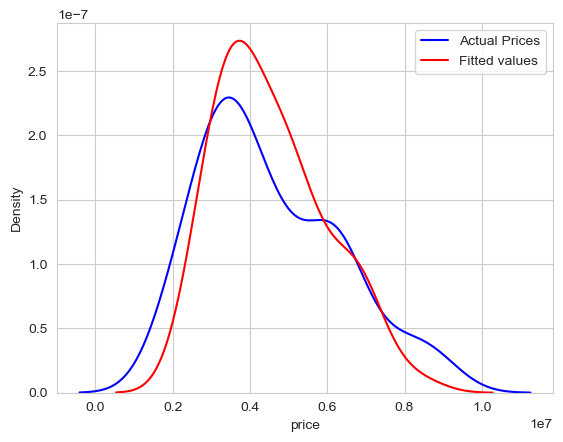

In [41]:
ax1 = sns.kdeplot(y_test, color='b', label='Actual Prices')
sns.kdeplot(y_pred, color='r', label='Fitted values', ax=ax1)
plt.legend()

Fitting all predictor variables with outliers removed & data normalized by MinMaxScaler

    MAE = 652812.594059406
    r2_score = 0.7570241008595766

kdeplot shows that the predicted values is close to the actual values.

<h4>* StandardScaler<h/4>

In [42]:
# splitting the target varible 'Price' from all other predictors variables

x1=df_encoded.drop(columns=['price'], axis=1)  # Predictor variables
y1=df_encoded['price']                         # Target value

In [43]:
x1.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,6000,4,1,2,2,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0
16,6600,4,2,2,1,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1
17,8500,3,2,4,2,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
18,4600,3,2,2,2,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0
19,6420,3,2,2,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0


In [44]:
# Normalizing data via Standard Scaler from sklearn.preprocessing.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x1) 

StandardScaler()

In [45]:
# transforming the predictor data x.

x1[:]=scaler.transform(x1)

In [46]:
x1.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,0.655560,1.466738,-0.564288,0.240770,1.785978,-0.419591,0.419591,0.464779,-0.464779,-1.376936,1.376936,0.214311,-0.214311,0.672439,-0.672439,0.530405,-0.530405,-0.570436,1.191759,-0.719848
16,0.997690,1.466738,1.772144,0.240770,0.505899,-0.419591,0.419591,-2.151561,2.151561,-1.376936,1.376936,0.214311,-0.214311,-1.487124,1.487124,-1.885350,1.885350,-0.570436,-0.839096,1.389181
17,2.081102,0.095776,1.772144,2.560501,1.785978,-0.419591,0.419591,0.464779,-0.464779,0.726250,-0.726250,0.214311,-0.214311,-1.487124,1.487124,0.530405,-0.530405,1.753046,-0.839096,-0.719848
18,-0.142743,0.095776,1.772144,0.240770,1.785978,-0.419591,0.419591,-2.151561,2.151561,0.726250,-0.726250,0.214311,-0.214311,-1.487124,1.487124,0.530405,-0.530405,1.753046,-0.839096,-0.719848
19,0.895051,0.095776,1.772144,0.240770,0.505899,-0.419591,0.419591,0.464779,-0.464779,0.726250,-0.726250,0.214311,-0.214311,-1.487124,1.487124,-1.885350,1.885350,-0.570436,1.191759,-0.719848


In [47]:
# split the data again using the train_test_split that was previously imported.

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=.2, random_state=42)  
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((400, 20), (101, 20), (400,), (101,))

In [48]:
# Fitting the new data into a linear regression
lr = LinearRegression()
lr.fit(x1_train, y1_train)

LinearRegression()

In [49]:
# Top 5 rows of the test sample.

y1_test[:5]

404    3493000
97     6300000
417    3395000
184    5110000
130    5866000
Name: price, dtype: int32

In [50]:
# Using the fitted model to predict the prices y_pred using the testing predictors x_test.

y1_pred = lr.predict(x1_test)

In [51]:
# Top 5 rows of the model prediction prices.

y1_pred[:5]

array([3217843.39815994, 5926848.87433541, 3162042.35373948,
       4926512.75522856, 3694649.43698429])

In [52]:
# evaluation

mean_absolute_error(y1_test, y1_pred) , r2_score(y1_test, y1_pred)

(665602.0180010106, 0.7476596226601808)

Fitting all predictor variables with outliers removed & data normalized by StandardScaler

    MAE = 665602.0180010106, 
    r2_score = 0.7476596226601808

<h4>* Conclusion:-</h4>

    Data normalization did slight improvement to the model, on the other hand trying lesser predictor variables may bring a better result.
    A value of MAE that is 14.65% of the targeted test sample mean is high 'y_test.mean()', an MAE les than 10% will be a good result.
    An r2_score of 0.757 is close to good and a result of 0.8 or higher would be good.
    Next i will try a more simpler multiple linear regressions with less predictor variables.

<div class="alert alert-success" role="alert">
    <strong><h4 align='center'><b>Multiple Linear Regressions with Different Sets of Predictors</b></h4></strong> 
</div>

- Here we are going to select one or more predictor variables to fit into linear regression, but not all the variables.
- Scatterplots and heatmaps can give an overview of correlation between the pridictor variables and the target value.

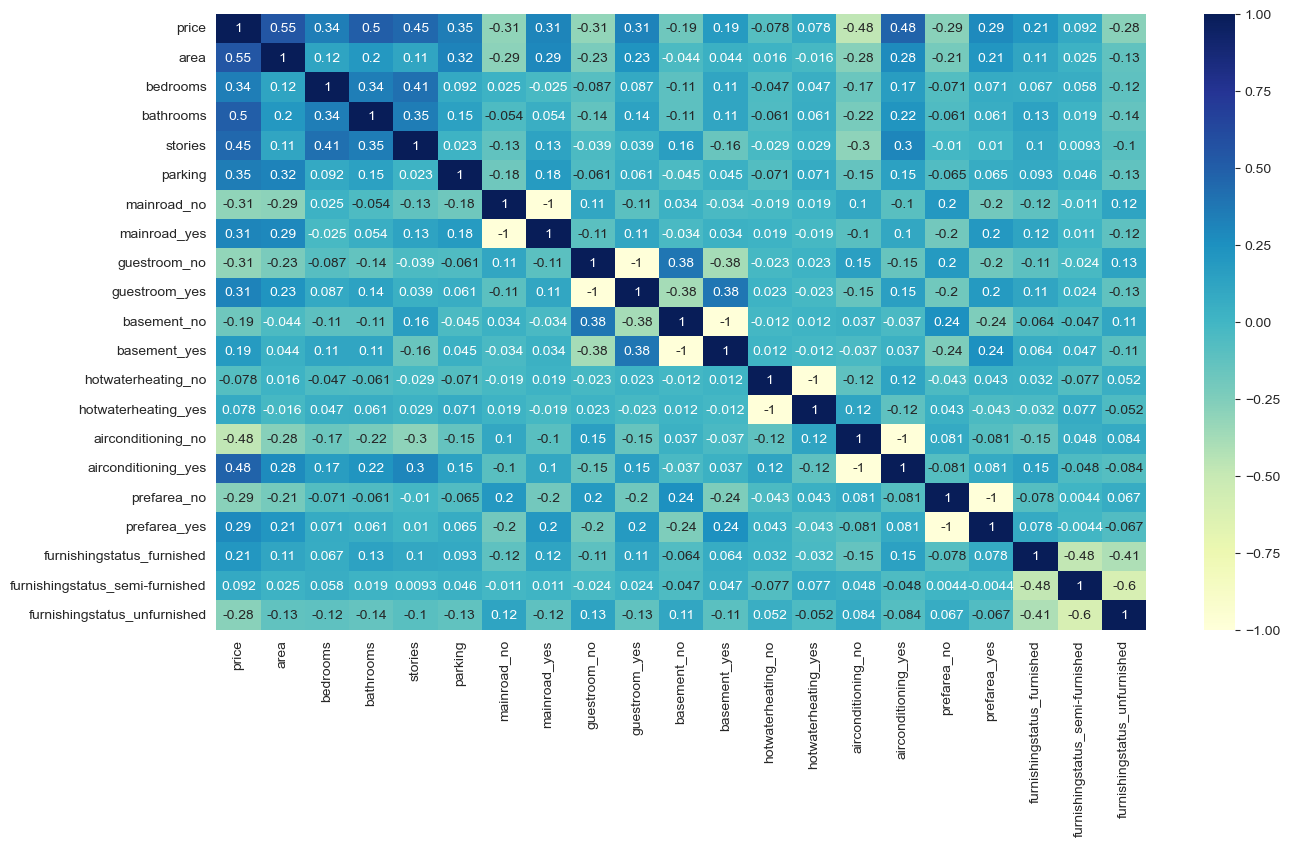

In [53]:
plt.figure(figsize=(15,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [54]:
# here is the correlation value between price and every predictor variable sorted ascending.

corr=df_encoded.corr().sort_values(by='price')
corr=corr['price']
corr

airconditioning_no                -0.475540
guestroom_no                      -0.312876
mainroad_no                       -0.305436
prefarea_no                       -0.285648
furnishingstatus_unfurnished      -0.283743
basement_no                       -0.185498
hotwaterheating_no                -0.078443
hotwaterheating_yes                0.078443
furnishingstatus_semi-furnished    0.092464
basement_yes                       0.185498
furnishingstatus_furnished         0.206807
prefarea_yes                       0.285648
mainroad_yes                       0.305436
guestroom_yes                      0.312876
bedrooms                           0.342352
parking                            0.347306
stories                            0.451837
airconditioning_yes                0.475540
bathrooms                          0.495775
area                               0.546387
price                              1.000000
Name: price, dtype: float64

    strong negative correlation <-0.7
    -0.7< moderate negative correlation <-0.3
    -0.3< weak negative correlation <0.0
    0.0< weak positive correlation <0.3
    0.3< moderate positive correlation <0.7
    0.7< strong positive correlation

Another way to test the significance of the correlation between each predictor variable and the price is P-value.

<h5><b>* The P-value is the probability value that the correlation between two variables is statistically significant.</b></h5>

Testing the top positive and negative correlated pridictors (price, airconditioning_no) and the lowest correlated predictor (hotwaterheating_yes).

    the p-value is $<$ 0.001: strong evidence that the correlation is significant
    the p-value is $<$ 0.05: moderate evidence that the correlation is significant
    the p-value is $<$ 0.1: weak evidence that the correlation is significant
    the p-value is $>$ 0.1: no evidence that the correlation is significant

In [55]:
from scipy import stats

In [56]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,0,1,1,0,...,1,1,0,1,0,1,0,0,1,0
16,9100000,6600,4,2,2,1,0,1,0,1,...,1,1,0,0,1,0,1,0,0,1
17,8960000,8500,3,2,4,2,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
18,8890000,4600,3,2,2,2,0,1,0,1,...,0,1,0,0,1,1,0,1,0,0
19,8855000,6420,3,2,2,1,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0


In [57]:
pearson_coef, p_value = stats.pearsonr(df_encoded['area'], df_encoded['price'])
pearson_coef, p_value

(0.5463874122697678, 2.460408074871023e-40)

Low P_value indicates correlation significance

In [58]:
pearson_coef, p_value = stats.pearsonr(df_encoded['airconditioning_no'], df_encoded['price'])
pearson_coef, p_value

(-0.47553998786598983, 1.2418722169128242e-29)

Low P_value indicates correlation significance

In [59]:
pearson_coef, p_value = stats.pearsonr(df_encoded['hotwaterheating_yes'], df_encoded['price'])
pearson_coef, p_value

(0.07844256085835848, 0.07941336289776443)

P_value > 0.05 indicates moderate significance

In [60]:
# splitting the target varible 'Price' from all other predictors variables.
# here i tried compining different predictor variable depending on corr values at line 51.

x2=(x[['area','bathrooms','airconditioning_yes', 'airconditioning_no','stories', 'bedrooms','parking','mainroad_yes', 'mainroad_no'
       ,'guestroom_yes','guestroom_no','prefarea_yes', 'prefarea_no', 'furnishingstatus_furnished', 'furnishingstatus_unfurnished'
      ,'basement_yes', 'basement_no','hotwaterheating_no']])          # Predictor variables
y2=df_encoded['price']                         # Target value

In [61]:
x2.head()

,area,bathrooms,airconditioning_yes,airconditioning_no,stories,bedrooms,parking,mainroad_yes,mainroad_no,guestroom_yes,guestroom_no,prefarea_yes,prefarea_no,furnishingstatus_furnished,furnishingstatus_unfurnished,basement_yes,basement_no,hotwaterheating_no
15,0.499426,0,0,1,0.333333,0.6,1.0,1,0,0,1,0,1,0,0,1,0,1
16,0.568312,1,1,0,0.333333,0.6,0.5,1,0,1,0,1,0,0,1,1,0,1
17,0.786452,1,1,0,1.000000,0.4,1.0,1,0,0,1,0,1,1,0,0,1,1
18,0.338691,1,1,0,0.333333,0.4,1.0,1,0,1,0,0,1,1,0,0,1,1
19,0.547646,1,1,0,0.333333,0.4,0.5,1,0,0,1,1,0,0,0,0,1,1


In [62]:
# splitting x2 & y2 dataframes into train and test samples.

# from sklearn.model_selection import train_test_split # called earlier

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=.2 , random_state=42) 
# random_state=42 so User do not get different raws & different results everytime using the model.

x2_train.shape,y2_train.shape,x2_test.shape,y2_test.shape

((400, 18), (400,), (101, 18), (101,))

In [63]:
#from sklearn.linear_model import LinearRegression  # previously called remove the first #

lr.fit(x2_train, y2_train)

LinearRegression()

In [64]:
y2_test.head()

404    3493000
97     6300000
417    3395000
184    5110000
130    5866000
Name: price, dtype: int32

In [65]:
y2_pred=lr.predict(x2_test)

In [66]:
y2_pred[:5]

array([3227648., 5898240., 3227648., 5013504., 3801088.])

In [67]:
# model evaluation
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mean_absolute_error(y2_test, y2_pred)

682336.0792079208

In [68]:
r2_score(y2_test, y2_pred)

0.7434242379347594

By compining different predictors each test, I got results that started at

    MAE = 845848.1072437116, 
    r2_score = 0.6325775885965157

all the way reaching

    MAE = 682336.0792079208, 
    r2_score = 0.7434242379347594


<h4>* Conclusion:-</h4>

    Trying lesser predictor variables did not give a better result for the model
    
    Furnishingstatus_semi-furnished does not has an impact on the model.
    
    Hotwaterheating_yes and hotwaterheating_no have same impact compined or separated.

<div class="alert alert-success" role="alert">
    <strong><h4 align='center'><b>Fitting the Model with Feature Engineered Columns</b></h4></strong> 
</div>

**Feature Engineering is the process of creating new features or transforming existing features to improve the performance of a machine-learning model.**

I will test:-
- Total rooms per house
- Number of rooms per story
- Number of bathrooms per story
- Story area

In [69]:
df_encoded.head(3)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,2,0,1,1,0,...,1,1,0,1,0,1,0,0,1,0
16,9100000,6600,4,2,2,1,0,1,0,1,...,1,1,0,0,1,0,1,0,0,1
17,8960000,8500,3,2,4,2,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0


In [70]:
# Can total count of rooms has an impact on the prices?

df_encoded['total_rooms']= df_encoded['bedrooms'] + df_encoded['guestroom_yes'] + df_encoded['bathrooms']

In [71]:
df_encoded[['total_rooms','price']].corr()

,total_rooms,price
total_rooms,1.000000,0.537729
price,0.537729,1.000000


A moderate positive correlation

In [72]:
# What about total rooms per story?!

df_encoded['rooms_per_floor'] = df_encoded['total_rooms'] / df_encoded['stories']

In [73]:
df_encoded[['rooms_per_floor','price']].corr()

,rooms_per_floor,price
rooms_per_floor,1.000000,-0.036203
price,-0.036203,1.000000


A very weak negative correlation

In [74]:
# We could expect that 2 bathrooms for a 4 story house would have a negative impact on the price as inhabitants might prefer a near bathroom.
# Lets take a look

df_encoded['bathrooms_per_story'] = df_encoded['bathrooms'] / df_encoded['stories']
df_encoded[['bathrooms_per_story','price']].corr()

,bathrooms_per_story,price
bathrooms_per_story,1.000000,-0.021139
price,-0.021139,1.000000


An unexpectedly very weak negative correlation

In [75]:
# Lets test area per story

df_encoded['mean_story_area'] = df_encoded['area'] / (df_encoded['stories'] + df_encoded['basement_yes'])
df_encoded[['mean_story_area', 'price']].corr() 

,mean_story_area,price
mean_story_area,1.000000,-0.063036
price,-0.063036,1.000000


A weak negative correlation

In [76]:
# Dropping the new columns with weak correlation

df_encoded.drop(columns=['rooms_per_floor','bathrooms_per_story','mean_story_area'], axis=1, inplace=True)

<h4>* Normalizing & Splitting the dataframe again to test the model  with the new column</h4>

In [77]:
# Dataframe normalization

x3 = df_encoded.drop(columns=['price'], axis = 1)
y3 = df_encoded['price']

In [78]:
scaler = StandardScaler()
scaler.fit(x3)

StandardScaler()

In [79]:
x3[:]=scaler.transform(x3)
x3.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,total_rooms
15,0.655560,1.466738,-0.564288,0.240770,1.785978,-0.419591,0.419591,0.464779,-0.464779,-1.376936,...,0.214311,-0.214311,0.672439,-0.672439,0.530405,-0.530405,-0.570436,1.191759,-0.719848,0.601724
16,0.997690,1.466738,1.772144,0.240770,0.505899,-0.419591,0.419591,-2.151561,2.151561,-1.376936,...,0.214311,-0.214311,-1.487124,1.487124,-1.885350,1.885350,-0.570436,-0.839096,1.389181,2.451194
17,2.081102,0.095776,1.772144,2.560501,1.785978,-0.419591,0.419591,0.464779,-0.464779,0.726250,...,0.214311,-0.214311,-1.487124,1.487124,0.530405,-0.530405,1.753046,-0.839096,-0.719848,0.601724
18,-0.142743,0.095776,1.772144,0.240770,1.785978,-0.419591,0.419591,-2.151561,2.151561,0.726250,...,0.214311,-0.214311,-1.487124,1.487124,0.530405,-0.530405,1.753046,-0.839096,-0.719848,1.526459
19,0.895051,0.095776,1.772144,0.240770,0.505899,-0.419591,0.419591,0.464779,-0.464779,0.726250,...,0.214311,-0.214311,-1.487124,1.487124,-1.885350,1.885350,-0.570436,1.191759,-0.719848,0.601724


In [80]:
# Splitting the datafram

# from sklearn.model_selection import train_test_split # Remove first '#' and run

x3_train, x3_test, y3_train, y3_test = train_test_split (x3, y3, test_size=0.2, random_state=42)
x3_train.shape, y3_train.shape, x3_test.shape, y3_test.shape

((400, 21), (400,), (101, 21), (101,))

In [81]:
# Fitting the model.

lr.fit(x3_train, y3_train)

LinearRegression()

In [82]:
y3_train.head()

428    3325000
35     8080940
362    3710000
372    3640000
77     6650000
Name: price, dtype: int32

In [83]:
y3_pred = lr.predict(x3_test)

In [84]:
y3_pred[:5]

array([3217843.39815994, 5926848.8743354 , 3162042.35373948,
       4926512.75522856, 3694649.43698428])

In [85]:
# Evaluation.

mean_absolute_error(y3_test, y3_pred) , r2_score(y3_test, y3_pred)

(665602.0180010108, 0.7476596226601806)

Fitting all predictor variables into the model + the feature engineered (total_rooms)

    MAE = 665602.0180010108, 
    r2_score = 0.7476596226601806

<h4>* Conclusion:-</h4>

    Trying the feature engineered variable did not give a better result for the model.

<div class="alert alert-success" role="alert">
    <strong><h4 align='center'><b>Testing Polynomial Regression via Pipelines</b></h4></strong> 
</div>

In [86]:
# Calling polynomial features & pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [87]:
# Defining a pipeline'pipe' that incluted the steps we run on the data

pipe=Pipeline(steps =[('scaler',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())])
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [88]:
xPipe=df_encoded.drop(columns=['price','total_rooms'], axis = 1)
yPipe=df_encoded['price']

In [89]:
xPipe_train, xPipe_test, yPipe_train, yPipe_test = train_test_split (xPipe, yPipe, test_size=0.2, random_state=42)
xPipe_train.shape, xPipe_test.shape, yPipe_train.shape, yPipe_test.shape

((400, 20), (101, 20), (400,), (101,))

In [90]:
xPipe_train = xPipe_train.astype(float)
pipe.fit(xPipe_train, yPipe_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [91]:
yhat = pipe.predict(xPipe_test)
yhat[:5]

array([3113152., 6567104., 3057088., 3780544., 4020928.])

In [92]:
mean_absolute_error(yPipe_test, yhat), r2_score(yPipe_test, yhat)

(684134.2574257426, 0.7131817319740784)

Trying polynomial regression via pipeline with the feature engineered column

    MAE = 677800.6336633663, 
    r2_score = 0.7189785571297055


Polynomial regression without the feature engineered column

    MAE = 684134.2574257426 , 
    r2_score = 0.7131817319740784

<div class="alert alert-success" role="alert">
    <strong><h3 align='center'><b>Documenting Results</b></h3></strong> 
</div>

<h4><b>
    
|  Model |  R2 |  MAE  |
|---|---|---|
| Multiple Linear Regression for all predictors & MinMaxScaler  | 0.7570241008595766  | 652812.594059406  |
| Multiple Linear Regression for all predictors not normalized using M2 area  | 0.7477138179826605  | 665355.0147424549  |
| Multiple Linear Regression for all predictors not normalized using SqFt area  | 0.747659622660183  | 665602.0180010083  |
| Multiple Linear Regression for all predictors & StandardScaler  | 0.7476596226601808  | 665602.0180010106  |
| Multiple Linear Regression for all predictors & feature engineered column  | 0.7476596226601806  | 665602.0180010108  |
| Multiple Linear Regression for 18 predictor (line 60)  | 0.7434242379347594  | 682336.0792079208  |
| Polynomial Regression  | 0.7189785571297055  | 677800.6336633663  |
| Multiple Linear Regression for Non categorical predictors  |  0.6325775885965157  | 845848.1072437116  |


</b></h4>

<h5 align='center'><b>I tried Lasso regression, but i couldn't get a better result out of it as I am not yet familiar with huperparameter tuning.</b></h5>

<div class ='alert alert-success' role='alert'>
    <strong><h4 align='center'><b> Decision Making</b></h4></strong>
</div>

<h5><b>Comparing the results of MAE and R2 of the models trained and tested, we conclude that the MLR model using all normalized predictors is the best model to be able to predict prices from the dataset, nearly 75% of the prices.</b></h5>

    MAE = 652812.594059406
    r2_score = 0.7570241008595766


<h5><b>More advanced machine learning models could be used, like Random Forest, Decision Trees, Lasso Regression, Gradiant Boosting and Neural Networks but I am not familiar with hyperparameter tuning and machine learning methods.</b></h5>

<div class='alert alert-danger' role='alert'>
    <strong><h4><b> Thanks for taking the time to navigate through my project!</b></h4></strong>
</div>

**Author**
<a href="https://www.linkedin.com/in/ramez-ellamey-b931b8a9/"><h3><b>Ramez Ellamey</b></h3></a>
<a href="https://github.com/ramez-abdelsalam/Portfolio"><h4><b>GitHub Portfolio</b></h4></a>
